### data from https://www.kaggle.com/emurphy/ames-iowa-housing-prices-dataset/version/1?login=true#train1.csv

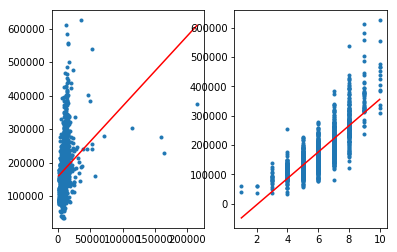

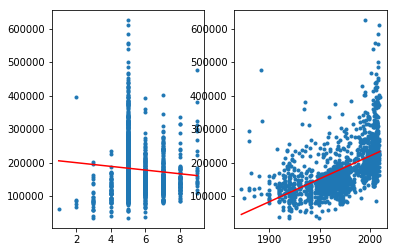

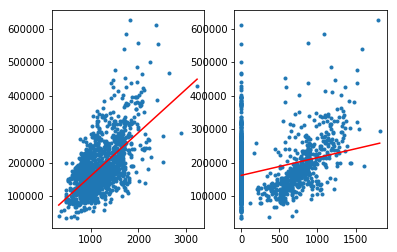

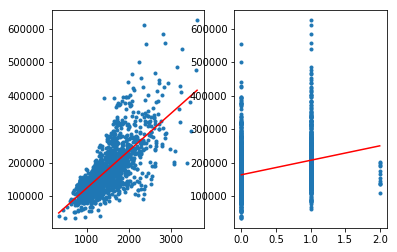

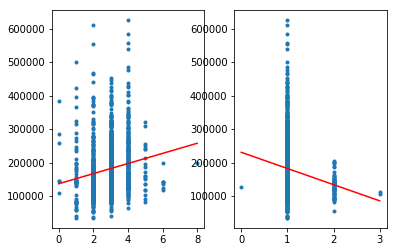

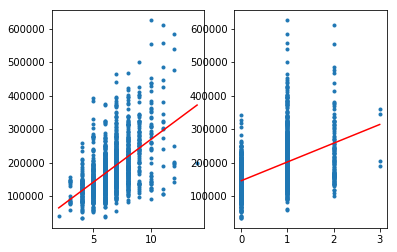

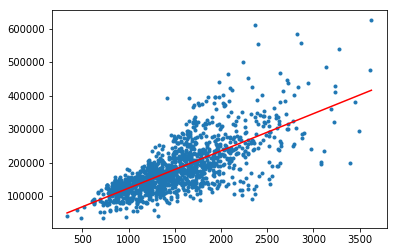

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = "house_train.csv"
# data = np.loadtxt(filename)
# X = data.T[1:16]
# Y = data.T[17]
# X.shape
df = pd.read_csv(filename)
data = df.values
X = data.T[1:17]
Y = data.T[17]

for i in range(16):
    if (i <4 or (i>5 and i<14) or i>15):
        plt.subplot(1,2,2-(i+1)%2)
        A = np.vstack([X[i], np.ones(len(X[i]))]).T
        w1, w0 = np.linalg.lstsq(A, Y, rcond=None)[0]
        t = np.linspace(np.min(X[i]),np.max(X[i]),20)
        plt.plot(X[i],Y,'.')
        plt.plot(t, w1*t + w0, 'r')
        if ((i+1)%2==0):
            plt.show()

i=8
A = np.vstack([X[i], np.ones(len(X[i]))]).T
w1, w0 = np.linalg.lstsq(A, Y, rcond=None)[0]
t = np.linspace(np.min(X[i]),np.max(X[i]),20)
plt.plot(X[i],Y,'.')
plt.plot(t, w1*t + w0, 'r')
plt.show()

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


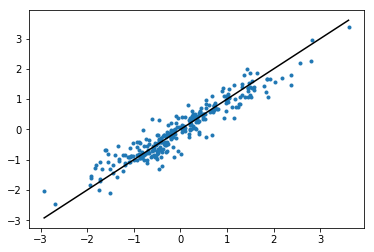

In [5]:
# randomly shuffle the data and split into TRAIN and TEST sets 
Ntrain= 1164
Ntest= 291
N = Ntrain+Ntest
np.random.shuffle(data)
Dx=data.T[1:17]
Dy=data.T[17]
X = Dx.T[0:Ntrain]
X_= Dx.T[Ntrain:N]
Y = np.log(Dy.T[0:Ntrain])
Y_= np.log(Dy.T[Ntrain:N])

# preprocess the data to standardize (remove mean and standardize variance)
from sklearn import preprocessing
X = preprocessing.scale(X)
X_ = preprocessing.scale(X_)
Y = preprocessing.scale(Y)
Y_ = preprocessing.scale(Y_)

# linear fit the data and plot the test y and predicted y
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(X,Y)
Y_pred = linreg.predict(X_)
plt.plot(Y_,Y_pred,'.')
t = np.linspace(np.min(Y_),np.max(Y_),20)
plt.plot([t[0], t[-1]],[t[0], t[-1]],'k-')
plt.show()

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


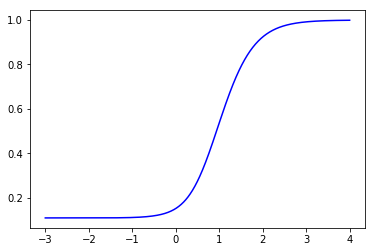

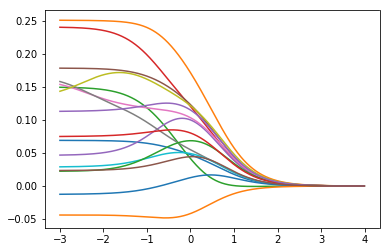

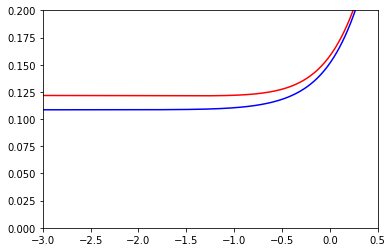

In [3]:
# randomly shuffle the data and split into TRAIN and TEST sets 
Ntrain= 1164
Ntest= 291
N = Ntrain+Ntest
np.random.shuffle(data)
Dx=data.T[1:17]
Dy=data.T[17]
X = Dx.T[0:Ntrain]
X_= Dx.T[Ntrain:N]
Y = np.log(Dy.T[0:Ntrain])
Y_= np.log(Dy.T[Ntrain:N])

# preprocess the data to standardize (remove mean and standardize variance)
from sklearn import preprocessing
X = preprocessing.scale(X)
X_ = preprocessing.scale(X_)
Y = preprocessing.scale(Y) 
Y_ = preprocessing.scale(Y_) 

# run ridge regression
from sklearn.linear_model import Ridge
Ns = 1000
MSE_train = np.zeros(Ns)
MSE_test = np.zeros(Ns)
Intct = np.zeros(Ns)
Coef = np.zeros((Ns,16))
for i in range(Ns):
    lambd = float(10)**(0.007*float(i)-3)
    ridgereg = Ridge(alpha=lambd,normalize=True)
    # fit the model for varying lambda
    ridgereg.fit(X,Y)
    # compute the predicted values for both train and test datasets
    Y_pred = ridgereg.predict(X_)
    Ypred  = ridgereg.predict(X)
 
    Intct[i] = ridgereg.intercept_
    Coef[i] = ridgereg.coef_
    MSE_train[i] = 1/float(Ntrain)*(sum((Y-Ypred)**2))
    MSE_test[i] = 1/float(Ntest)*(sum((Y_-Y_pred)**2))

    
# plot training error and the coefficient values 
plt.plot(0.007*np.arange(Ns)-3,MSE_train,'-b')
plt.show()
plt.plot(0.007*np.arange(Ns)-3,Coef)
plt.show()

# plot the trianing and test error (for a zommed-in regime) and the coefficient values
I=1000
plt.axis([-3, 0.5, 0, 0.2])
plt.plot(0.007*np.arange(I)-3,MSE_test[0:I],'-r')
plt.plot(0.007*np.arange(I)-3,MSE_train[0:I],'-b')
plt.show()



## piecewise linear fit

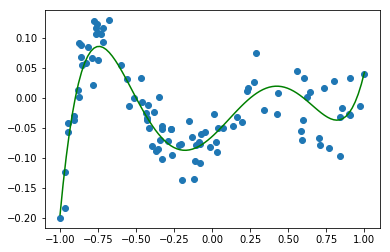

In [4]:
# generate training data
import numpy as np
N = 100
x = np.random.uniform(-1,1,N)
x = np.sort(x)
x[0]=-1
x[N-1]=1
y = (x-.95)*(x-.6)*(x-.25)*(x+.5)*(x+.9) + .03*np.random.randn(N)
# generate test data
N_ = 100
x_ = np.random.uniform(-1,1,N_)
y_ = (x_-.95)*(x_-.6)*(x_-.25)*(x_+.5)*(x_+.9) + .03*np.random.randn(N_)

t = np.linspace(-1,1,100)
y0 = (t-.95)*(t-.6)*(t-.25)*(t+.5)*(t+.9)

import matplotlib.pyplot as plt
plt.plot(x,y,'o')
plt.plot(t,y0,'g-')
plt.show()

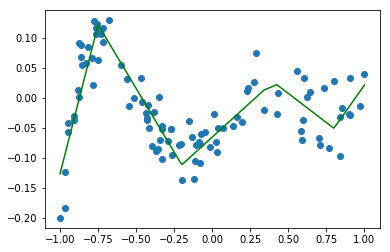

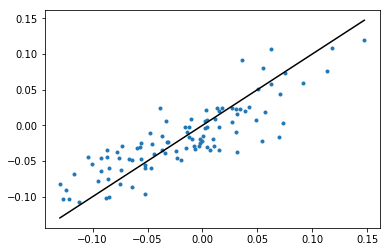

In [5]:
# feature engineering
A = np.zeros((6,len(x)))
A_ = np.zeros((6,len(x_)))
A[0] = np.ones(len(x))
A[1] = np.clip(x,-1,1)
A[2] = np.clip(x,-0.75,1)
A[3] = np.clip(x,-0.2,1)
A[4] = np.clip(x,0.4,1)
A[5] = np.clip(x,0.8,1)
A_[0] = np.ones(len(x_))
A_[1] = np.clip(x_,-1,1)
A_[2] = np.clip(x_,-0.75,1)
A_[3] = np.clip(x_,-0.2,1)
A_[4] = np.clip(x_,0.4,1)
A_[5] = np.clip(x_,0.8,1)

# Ridge regression fit
from sklearn.linear_model import Ridge
lambd = 0.000001
ridgereg = Ridge(alpha=lambd,normalize=True)
# fit the model for varying lambda
ridgereg.fit(A.T,y)
# compute the predicted values for both train and test datasets
y_pred = ridgereg.predict(A_.T)
ypred  = ridgereg.predict(A.T)

Intct = ridgereg.intercept_
Coef = ridgereg.coef_
MSE_train = 1/float(N)*(sum((y-ypred)**2))
MSE_test = 1/float(N_)*(sum((y_-y_pred)**2))

plt.plot(x,y,'o')
plt.plot(x,ypred,'g-')
plt.show()

plt.plot(y_,y_pred,'.')
t = np.linspace(np.min(y_),np.max(y_),20)
plt.plot([t[0], t[-1]],[t[0], t[-1]],'k-')
plt.show()

In [6]:
# generate training data where there are more parameters than the data points
import numpy as np
N=3
x = np.zeros(N)
x_ = np.zeros(N)
x[0]=-.9
x[1]=0.6
x[2]=0.73
y = (x-.95)*(x-.6)*(x-.25)*(x+.5)*(x+.9) + .003*np.random.randn(N)
N_=100
x_= np.random.uniform(-1,1,N_)
x_ = np.sort(x_)
y_ = (x_-.95)*(x_-.6)*(x_-.25)*(x_+.5)*(x_+.9) + .03*np.random.randn(N_)

# feature engineering
A = np.zeros((10,len(x)))
A_ = np.zeros((10,len(x_)))
A[0] = np.ones(len(x))
A[1] = np.clip(x,-0.8,1)
A[2] = np.clip(x,-0.6,1)
A[3] = np.clip(x,-0.4,1)
A[4] = np.clip(x,-0.2,1)
A[5] = np.clip(x,0.,1)
A[6] = np.clip(x,0.2,1)
A[7] = np.clip(x,0.4,1)
A[8] = np.clip(x,0.6,1)
A[9] = np.clip(x,0.8,1)
A_[0] = np.ones(len(x_))
A_[1] = np.clip(x_,-0.8,1)
A_[2] = np.clip(x_,-0.6,1)
A_[3] = np.clip(x_,-0.4,1)
A_[4] = np.clip(x_,-0.2,1)
A_[5] = np.clip(x_,0.,1)
A_[6] = np.clip(x_,0.2,1)
A_[7] = np.clip(x_,0.4,1)
A_[8] = np.clip(x_,0.6,1)
A_[9] = np.clip(x_,0.8,1)


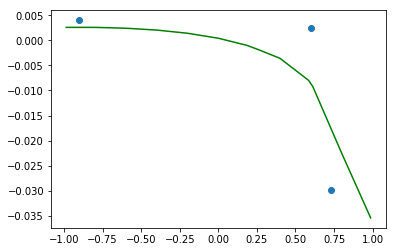

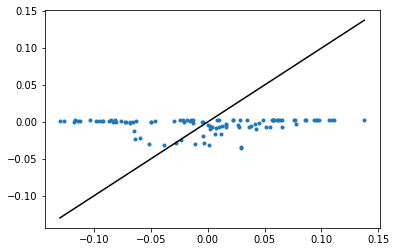

In [7]:

# Ridge regression fit
from sklearn.linear_model import Ridge
lambd = 3
ridgereg = Ridge(alpha=lambd,normalize=True)
# fit the model for varying lambda
ridgereg.fit(A.T,y)
# compute the predicted values for both train and test datasets
y_pred = ridgereg.predict(A_.T)
ypred  = ridgereg.predict(A.T)

Intct = ridgereg.intercept_
Coef = ridgereg.coef_
MSE_train = 1/float(N)*(sum((y-ypred)**2))
MSE_test = 1/float(N_)*(sum((y_-y_pred)**2))

t=np.linspace(-1,1,100)
plt.plot(x,y,'o')

plt.plot(x_,y_pred,'g-')
plt.show()

plt.plot(y_,y_pred,'.')
t = np.linspace(np.min(y_),np.max(y_),20)
plt.plot([t[0], t[-1]],[t[0], t[-1]],'k-')
plt.show()

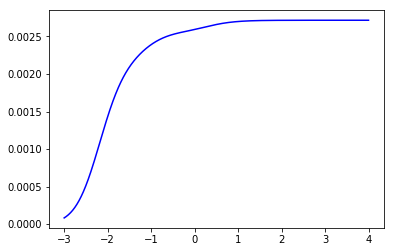

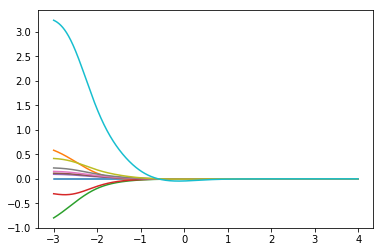

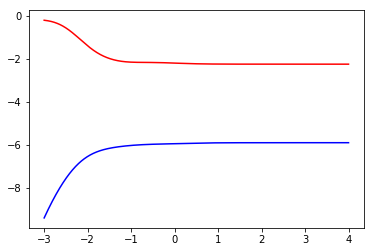

In [8]:
# generate training data where there are more parameters than the data points
import numpy as np
N=5
x = np.zeros(N)
x_ = np.zeros(N)
x= np.random.uniform(-1,1,N)
y = (x-.95)*(x-.6)*(x-.25)*(x+.5)*(x+.9) + .03*np.random.randn(N)
N_=100
x_= np.random.uniform(-1,1,N_)
y_ = (x_-.95)*(x_-.6)*(x_-.25)*(x_+.5)*(x_+.9) + .03*np.random.randn(N_)

# feature engineering
A = np.zeros((10,len(x)))
A_ = np.zeros((10,len(x_)))
A[0] = np.ones(len(x))
A[1] = np.clip(x,-0.8,1)
A[2] = np.clip(x,-0.6,1)
A[3] = np.clip(x,-0.4,1)
A[4] = np.clip(x,-0.2,1)
A[5] = np.clip(x,0.,1)
A[6] = np.clip(x,0.2,1)
A[7] = np.clip(x,0.4,1)
A[8] = np.clip(x,0.6,1)
A[9] = np.clip(x,0.8,1)
A_[0] = np.ones(len(x_))
A_[1] = np.clip(x_,-0.8,1)
A_[2] = np.clip(x_,-0.6,1)
A_[3] = np.clip(x_,-0.4,1)
A_[4] = np.clip(x_,-0.2,1)
A_[5] = np.clip(x_,0.,1)
A_[6] = np.clip(x_,0.2,1)
A_[7] = np.clip(x_,0.4,1)
A_[8] = np.clip(x_,0.6,1)
A_[9] = np.clip(x_,0.8,1)

# run ridge regression
from sklearn.linear_model import Ridge
Ns = 1000
MSE_train = np.zeros(Ns)
MSE_test = np.zeros(Ns)
Intct = np.zeros(Ns)
Coef = np.zeros((Ns,10))
for i in range(Ns):
    lambd = float(10)**(0.009*float(i)-3)
    ridgereg = Ridge(alpha=lambd,normalize=True)
    # fit the model for varying lambda
    ridgereg.fit(A.T,y)
    # compute the predicted values for both train and test datasets
    Y_pred = ridgereg.predict(A_.T)
    Ypred  = ridgereg.predict(A.T)
 
    Intct[i] = ridgereg.intercept_
    Coef[i] = ridgereg.coef_
    MSE_train[i] = 1/float(N)*(sum((y-Ypred)**2))
    MSE_test[i] = 1/float(N)*(sum((y_-Y_pred)**2))

    
# plot training error and the coefficient values 
plt.plot(0.007*np.arange(Ns)-3,MSE_train,'-b')
plt.show()
plt.plot(0.007*np.arange(Ns)-3,Coef)
plt.show()

# plot the trianing and test error (for a zommed-in regime) and the coefficient values
I=1000
plt.plot(0.007*np.arange(I)-3,np.log(MSE_test[0:I]),'-r')
plt.plot(0.007*np.arange(I)-3,np.log(MSE_train[0:I]),'-b')
plt.show()


# importance of cross validation

### in this example, we show that using test error to choose hyper parameters can lead to 
- cheating, and 
- significant bias,

which hurts the performance of your predictor in the wild

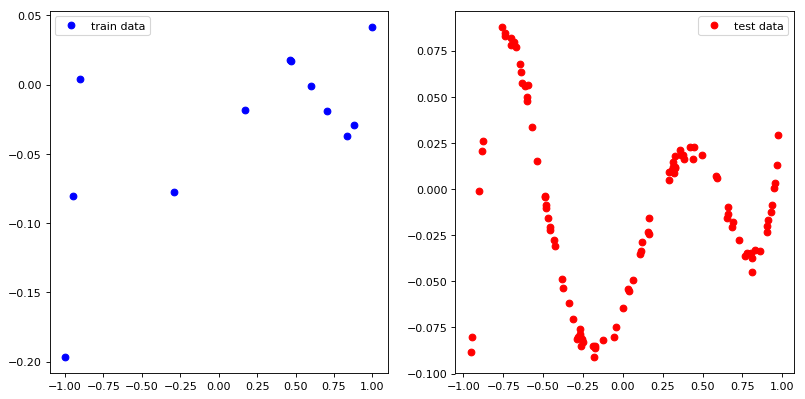

In [108]:
# generate training data
import numpy as np
N = 12
x = np.random.uniform(-1,1,N)
x = np.sort(x)
x[0]=-1
x[1]=-0.95
x[2]=-0.9
x[N-1]=1
y = (x-.95)*(x-.6)*(x-.25)*(x+.5)*(x+.9) + .003*np.random.randn(N)
# generate test data
N_ = 100
x_ = np.random.uniform(-1,1,N_)
#x_[0]=-1
#x_[1]=-0.8
#x_[2]=-0.6
#x_[3]=-0.4
#x_[4]=-0.2
#x_[5]=0.0
#x_[6]=0.2
#x_[7]=0.4
#x_[8]=0.6
#x_[9]=0.8
#x_[10]=1.0
x_= np.sort(x_)
y_ = (x_-.95)*(x_-.6)*(x_-.25)*(x_+.5)*(x_+.9) + .003*np.random.randn(N_)

t = np.linspace(-1,1,100)
y0 = (t-.95)*(t-.6)*(t-.25)*(t+.5)*(t+.9)

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(x,y,'ob',label='train data')
#plt.plot(t,y0,'k-')
plt.legend()
#axes = plt.gca()
#axes.set_ylim([-0.4,0.2])
plt.subplot(1,2,2)
plt.plot(x_,y_,'or',label='test data')
#plt.plot(t,y0,'k-')
plt.legend()
plt.show()

In [109]:
# the features for piece-wise linear funcitons
A = np.zeros((10,len(x)))
A_ = np.zeros((10,len(x_)))
A__ = np.zeros((10,len(x_)))
#A[0] = np.ones(len(x))
A[0] = x
A[1] = np.clip(x,-0.8,1)
A[2] = np.clip(x,-0.6,1)
A[3] = np.clip(x,-0.4,1)
A[4] = np.clip(x,-0.2,1)
A[5] = np.clip(x,0.,1)
A[6] = np.clip(x,0.2,1)
A[7] = np.clip(x,0.4,1)
A[8] = np.clip(x,0.6,1)
A[9] = np.clip(x,0.8,1)
#A_[0] = np.ones(len(x_))
A_[0] = x_
A_[1] = np.clip(x_,-0.8,1)
A_[2] = np.clip(x_,-0.6,1)
A_[3] = np.clip(x_,-0.4,1)
A_[4] = np.clip(x_,-0.2,1)
A_[5] = np.clip(x_,0.,1)
A_[6] = np.clip(x_,0.2,1)
A_[7] = np.clip(x_,0.4,1)
A_[8] = np.clip(x_,0.6,1)
A_[9] = np.clip(x_,0.8,1)
#A__[0] = np.ones(len(t))
A__[0] = t
A__[1] = np.clip(t,-0.8,1)
A__[2] = np.clip(t,-0.6,1)
A__[3] = np.clip(t,-0.4,1)
A__[4] = np.clip(t,-0.2,1)
A__[5] = np.clip(t,0.,1)
A__[6] = np.clip(t,0.2,1)
A__[7] = np.clip(t,0.4,1)
A__[8] = np.clip(t,0.6,1)
A__[9] = np.clip(t,0.8,1)


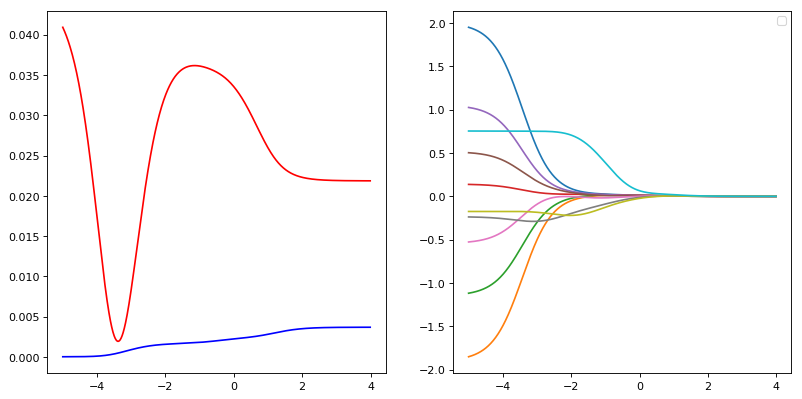

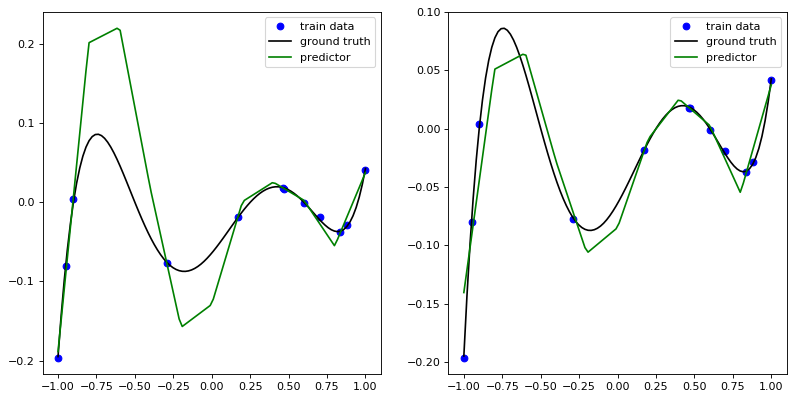

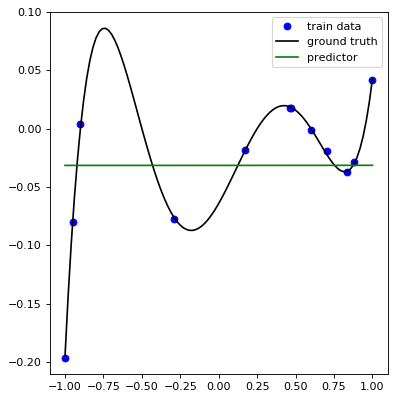

In [113]:
# run ridge regression
from sklearn.linear_model import Ridge
Ns = 1000
MSE_train = np.zeros(Ns)
MSE_test = np.zeros(Ns)
MSE_test_min = 10000
Intct = np.zeros(Ns)
Coef = np.zeros((Ns,10))

for i in range(Ns):
    lambd = float(10)**(0.009*float(i)-5)
#    lambd = np.random.uniform(0.1,1,10)
#    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)+np.eye()),X.T),y)   
    ridgereg = Ridge(alpha=lambd,normalize=True)
    # fit the model for varying lambda
    ridgereg.fit(A.T,y)
    # compute the predicted values for both train and test datasets
    Y_pred = ridgereg.predict(A_.T)
    Ypred  = ridgereg.predict(A.T)
 
    Intct[i] = ridgereg.intercept_
    Coef[i] = ridgereg.coef_
    MSE_train[i] = 1/float(N)*(sum((y-Ypred)**2))
    MSE_test[i] = 1/float(N)*(sum((y_-Y_pred)**2))
    if (i==0):
        MSE_test0 = MSE_test[0]
        Y_pred_0 = ridgereg.predict(A__.T)
    if (MSE_test[i] < MSE_test_min):
        MSE_test_min = MSE_test[i]
        Y_pred_min = ridgereg.predict(A__.T)
    if (i==Ns-1):
        MSE_test1 = MSE_test[-1]
        Y_pred_1 = ridgereg.predict(A__.T)
    
# plot training error and the coefficient values 
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(0.009*np.arange(Ns)-5,MSE_train,'-b')
plt.plot(0.009*np.arange(Ns)-5,MSE_test,'-r')
plt.subplot(1,2,2)
plt.plot(0.009*np.arange(Ns)-5,Coef)
plt.legend()
plt.show()

fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(x,y,'ob',label='train data')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(t,Y_pred_0,'g-',label='predictor')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x,y,'ob',label='train data')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(t,Y_pred_min,'g-',label='predictor')
plt.legend()
plt.show()

fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(x,y,'ob',label='train data')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(t,Y_pred_1,'g-',label='predictor')
plt.legend()


to illustrate this, we consider an extreme example with 
- N = 1 trianing smaples, but 
- N_= 100 test samples

and treat $w$ as a hyperparameter to be tuned

we randomly select $w$ and use the test error to find the best model (note that there is no training happening)

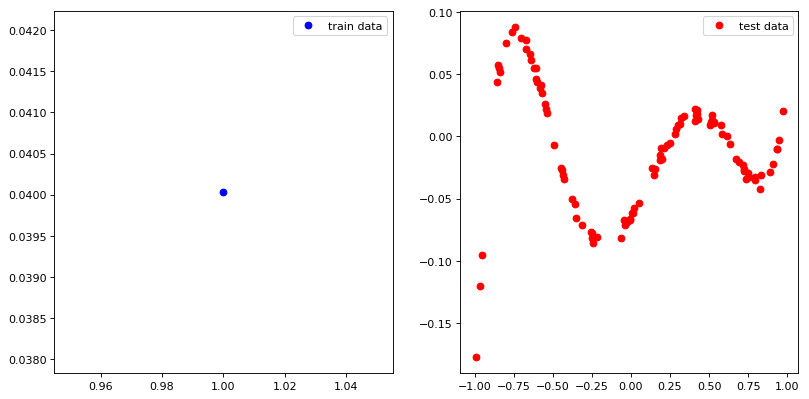

In [154]:
# generate training data
import numpy as np
N = 1
x = np.random.uniform(-1,1,N)
x = np.sort(x)
x[0]=-1
x[N-1]=1
y = (x-.95)*(x-.6)*(x-.25)*(x+.5)*(x+.9) + .003*np.random.randn(N)
# generate test data
N_ = 100
x_ = np.random.uniform(-1,1,N_)
#x_[0]=-1
#x_[1]=-0.8
#x_[2]=-0.6
#x_[3]=-0.4
#x_[4]=-0.2
#x_[5]=0.0
#x_[6]=0.2
#x_[7]=0.4
#x_[8]=0.6
#x_[9]=0.8
#x_[10]=1.0
x_= np.sort(x_)
y_ = (x_-.95)*(x_-.6)*(x_-.25)*(x_+.5)*(x_+.9) + .003*np.random.randn(N_)

t = np.linspace(-1,1,100)
y0 = (t-.95)*(t-.6)*(t-.25)*(t+.5)*(t+.9)

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(x,y,'ob',label='train data')
#plt.plot(t,y0,'k-')
plt.legend()
#axes = plt.gca()
#axes.set_ylim([-0.4,0.2])
plt.subplot(1,2,2)
plt.plot(x_,y_,'or',label='test data')
#plt.plot(t,y0,'k-')
plt.legend()
plt.show()

In [155]:
# the features for piece-wise linear funcitons
A = np.zeros((11,len(x)))
A_ = np.zeros((11,len(x_)))
A__ = np.zeros((11,len(x_)))
#A[0] = np.ones(len(x))
A[0] = x
A[1] = np.clip(x,-0.8,1)
A[2] = np.clip(x,-0.6,1)
A[3] = np.clip(x,-0.4,1)
A[4] = np.clip(x,-0.2,1)
A[5] = np.clip(x,0.,1)
A[6] = np.clip(x,0.2,1)
A[7] = np.clip(x,0.4,1)
A[8] = np.clip(x,0.6,1)
A[9] = np.clip(x,0.8,1)
A[10] = np.ones(len(x))
#A_[0] = np.ones(len(x_))
A_[0] = x_
A_[1] = np.clip(x_,-0.8,1)
A_[2] = np.clip(x_,-0.6,1)
A_[3] = np.clip(x_,-0.4,1)
A_[4] = np.clip(x_,-0.2,1)
A_[5] = np.clip(x_,0.,1)
A_[6] = np.clip(x_,0.2,1)
A_[7] = np.clip(x_,0.4,1)
A_[8] = np.clip(x_,0.6,1)
A_[9] = np.clip(x_,0.8,1)
A_[10] = np.ones(len(x_))
#A__[0] = np.ones(len(t))
A__[0] = t
A__[1] = np.clip(t,-0.8,1)
A__[2] = np.clip(t,-0.6,1)
A__[3] = np.clip(t,-0.4,1)
A__[4] = np.clip(t,-0.2,1)
A__[5] = np.clip(t,0.,1)
A__[6] = np.clip(t,0.2,1)
A__[7] = np.clip(t,0.4,1)
A__[8] = np.clip(t,0.6,1)
A__[9] = np.clip(t,0.8,1)
A__[10] = np.ones(len(t))

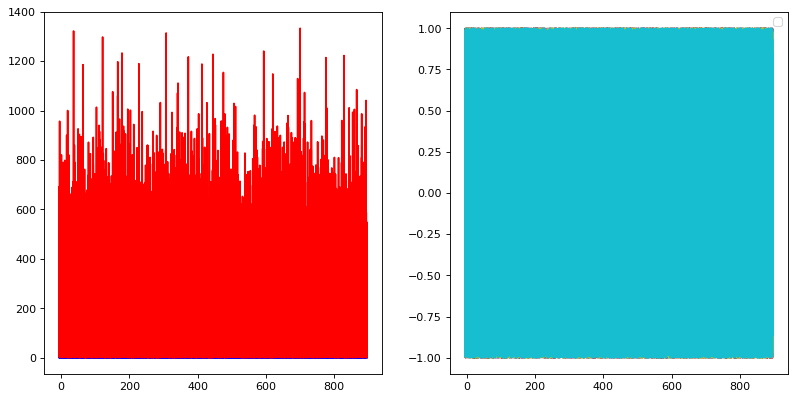

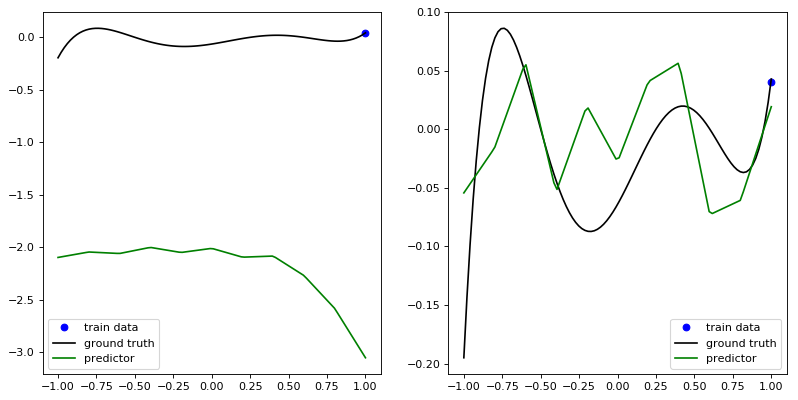

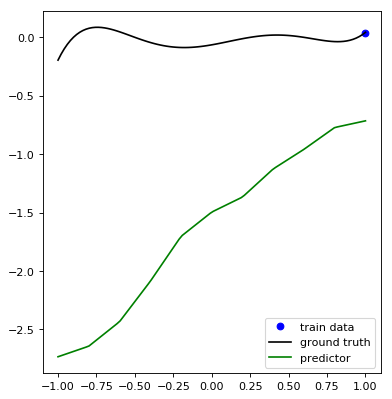

In [156]:
# run ridge regression
from sklearn.linear_model import Ridge
Ns = 100000
MSE_train = np.zeros(Ns)
MSE_test = np.zeros(Ns)
MSE_test_min = 10000
Intct = np.zeros(Ns)
Coef = np.zeros((Ns,10))

for i in range(Ns):
#    lambd = float(10)**(0.009*float(i)-5)
#    lambd = np.random.uniform(0.0000001,0.1,11)
#    lambd[10] = 0
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(A,A.T)+np.diag(lambd)),A),y)   
    w = np.random.uniform(-1,1,11)
#    ridgereg = Ridge(alpha=lambd,normalize=True)
    # fit the model for varying lambda
#    ridgereg.fit(A.T,y)
    # compute the predicted values for both train and test datasets
#    Y_pred = ridgereg.predict(A_.T)
#    Ypred  = ridgereg.predict(A.T)
    Y_pred = np.matmul(A_.T,w)
    Ypred  = np.matmul(A.T,w)
 
    Intct[i] = w[10]
    Coef[i] = w[0:10]
    MSE_train[i] = 1/float(N)*(sum((y-Ypred)**2))
    MSE_test[i] = 1/float(N)*(sum((y_-Y_pred)**2))
    if (i==0):
        MSE_test0 = MSE_test[0]
        Y_pred_0 = np.matmul(A__.T,w)
    if (MSE_test[i] < MSE_test_min):
        MSE_test_min = MSE_test[i]
        Y_pred_min = np.matmul(A__.T,w)
    if (i==Ns-1):
        MSE_test1 = MSE_test[-1]
        Y_pred_1 = np.matmul(A__.T,w)
    
# plot training error and the coefficient values 
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(0.009*np.arange(Ns)-5,MSE_train,'-b')
plt.plot(0.009*np.arange(Ns)-5,MSE_test,'-r')
plt.subplot(1,2,2)
plt.plot(0.009*np.arange(Ns)-5,Coef)
plt.legend()
plt.show()

fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(x,y,'ob',label='train data')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(t,Y_pred_0,'g-',label='predictor')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x,y,'ob',label='train data')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(t,Y_pred_min,'g-',label='predictor')
plt.legend()
plt.show()

fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(x,y,'ob',label='train data')
plt.plot(t,y0,'k-',label='ground truth')
plt.plot(t,Y_pred_1,'g-',label='predictor')
plt.legend()


In [123]:
np.size(A)


90

In [124]:
len(x)

9